# Challenge 2.2.7

In [29]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy
from sklearn.naive_bayes import BernoulliNB
import matplotlib.pyplot as plt
import seaborn as sns

I will be building a text classifier on Amazon reviews for electronics.  There are 500 positive and 500 negative reviews in the dataset.

[This dataset](https://archive.ics.uci.edu/ml/datasets/Sentiment+Labelled+Sentences) is from the UCI Machine Learning database. It was created for the paper [From Group to Individual Labels using Deep Features](http://mdenil.com/media/papers/2015-deep-multi-instance-learning.pdf), Kotzias et. al., KDD 2015.

In [30]:
# Grab and process the raw data.
df_raw = pd.read_csv('datafiles/sentiment labelled sentences/amazon_cells_labelled.txt', 
                     sep="\t", header=None, error_bad_lines=False)
df_raw.columns = ['comment','positive']

In [31]:
df_raw.head()

,comment,positive
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1


In [32]:
df_raw.positive.value_counts()

1    500
0    500
Name: positive, dtype: int64

Creating columns that indiate whether or not the comment contains select positive keywords.

In [33]:
keywords = ['great','good','love','recommend','nice','excellent', 'best','simple','reasonabl', 'beautiful'
            ,'satisfied','quality','easy','well', 'must have','happy', 'sturdy','fast','pleased',
           'superb', 'value', 'must have', 'incredible','helpful','fine','quick','!','fit','comfortable','deal']

for key in keywords:
    df_raw[str(key)] = df_raw.comment.str.contains(str(key), case=False)

In [34]:
df_raw.head()

,comment,positive,great,good,love,recommend,nice,excellent,best,simple,...,superb,value,incredible,helpful,fine,quick,!,fit,comfortable,deal
0,So there is no way for me to plug it in here i...,0,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,"Good case, Excellent value.",1,False,True,False,False,False,True,False,False,...,False,True,False,False,False,False,False,False,False,False
2,Great for the jawbone.,1,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,Tied to charger for conversations lasting more...,0,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
4,The mic is great.,1,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


Checking Naive Bayes assumption that variables are independent from each other using a correlation heatmap.

It looks pretty good!

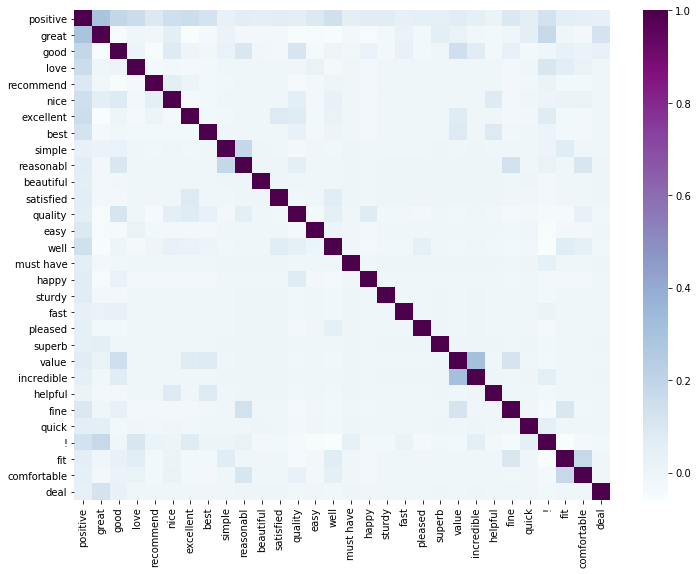

In [35]:
#Set up matplotlib
f, ax = plt.subplots(figsize=(12,9))

sns.heatmap(df_raw.corr(), cmap='BuPu')

Setting up input and output variables to put in model.

In [36]:
data = df_raw[keywords]
target = df_raw['positive']

Building model using Bernoulli classifier, since our data is binary (0, 1 positive comment).

In [37]:
# Instantiate model and store it in variable bnb
bnb = BernoulliNB()

# Fit model to data
# This is the fitted model for Amazon data.
amazon_fit = bnb.fit(data, target)

# Classify and store result in new variable
# 
y_pred = bnb.predict(data)

# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target != y_pred).sum()
))

Number of mislabeled points out of a total 1000 points : 223


Model has a 78.2% accuracy.

Now let's try it on yelp reviews!

In [38]:
# Grab and process the raw data.
yelp = pd.read_csv('datafiles/sentiment labelled sentences/yelp_labelled.txt', 
                     sep="\t", header=None, error_bad_lines=False)
yelp.columns = ['comment','positive']

In [39]:
yelp.head()

,comment,positive
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


Creating columns with positive keywords to indicate whether or not they are present in comment.

In [40]:
for key in keywords:
    yelp[str(key)] = yelp.comment.str.contains(str(key), case=False)

In [41]:
yelp.head()

,comment,positive,great,good,love,recommend,nice,excellent,best,simple,...,superb,value,incredible,helpful,fine,quick,!,fit,comfortable,deal
0,Wow... Loved this place.,1,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,Crust is not good.,0,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,Not tasty and the texture was just nasty.,0,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,Stopped by during the late May bank holiday of...,1,False,False,True,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,The selection on the menu was great and so wer...,1,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


Storing inputs and outputs...

In [42]:
y_data = yelp[keywords]
y_target = yelp['positive']

In [43]:
# Using Amazon model to predict yelp data

yelp_pred = amazon_fit.predict(y_data)

# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target != yelp_pred).sum()
))

Number of mislabeled points out of a total 1000 points : 496


Not surprisingly, the model performed worse on Yelp reviews, as some of the keywords are more product-oriented (eg. study, easy, simple).  The accuracy of the model on yelp reviews is a dismal 50.4%

### Sensitivity and Specificity

Let's see how sensitive and specific this model is for Amazon reviews.

In [44]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(target, y_pred)
print(cm)

[[449  51]
 [172 328]]


In [47]:
# Sensitivity - Ability to correctly identify a positive review
print('Sensitivity: ' + str(cm[0][0]/(cm[0][0]+cm[0][1])))

# Specificity: Ability to correctly identify negative review
print('Specificity: ' + str(cm[1][0]/(cm[1][0]+cm[1][1])))

Sensitivity: 0.898
Specificity: 0.344


The ability to predict a positive review is at 89.9%, which is pretty good.  The specificity is at 65.6%, which is not so great.  If you are a product developer, the negative reviews are probably more important than the positive reviews, so you would want to increase the specificity of the model.  

### Holdout group

In [18]:
#Pull 30% of cases and store it in holdout
holdout = df_raw.sample(frac = 0.3, random_state=4566)

#Training data is the rest of the data (70%).
train = df_raw.drop(holdout.index)

In [19]:
datasets = [train, holdout]

for d in datasets:
    for key in keywords:
        d[key] = d['comment'].str.contains(key, case=False)

In [20]:
# Setting up training data for modeling
data = train[keywords]
target = train['positive']

h_data = holdout[keywords]
h_target = holdout['positive']

In [21]:
# Using training data to build model
bnb = BernoulliNB()

# Fitting model to data
a_model = bnb.fit(data,target)

# Testing holdout data on model
holdout_pred = a_model.predict(h_data)

# Printing results
print('Number of mislabelled points out of {} points: {}'.format(h_data.shape[0], 
                                                                 (h_target != holdout_pred).sum()))

Number of mislabelled points out of 300 points: 72


The accuracy when using the fitted model to test the holdout group is 76.0%, which is not too far from the accuracy we got (78.2%) when we used the entire dataset to train and test the model.

### Cross Validation
Building the model and testing it on 10 folds.

In [22]:
# Doing 10 folds
k = 10

# Size of folds
f_size = df_raw.shape[0] // k
print(f_size)    

100


In [23]:
range(k)

range(0, 10)

In [112]:
def cross_val(df, k):
    index = 0
    fold_size = df.shape[0] // k
    
    for i in range(k):
        start = index
        end = index + fold_size

        cross_val = df[start:end]
        train_data = df.drop(cross_val.index)

        t_data = train_data[keywords]
        t_target = train_data['positive']

        cv_data = cross_val[keywords]
        cv_target = cross_val['positive']

    # Building model with training data
        bnb = BernoulliNB()
        t_model = bnb.fit(t_data, t_target)

    # Testing model on cross validation group
        cv_pred = t_model.predict(cv_data)

    # Printing confusion matrix and sensitivity and specificity calculations
        cm = confusion_matrix(cv_target, cv_pred)

        print('Confusion Matrix for Cross Validation Group ' + str(start) + ' : ' + str(end))
        print(cm)

        # Sensitivity - Ability to correctly identify a positive review
        print('Sensitivity: ' + str((cm[0][0]/(cm[0][0]+cm[0][1])).round(4)))

        # Specificity: Ability to correctly identify negative review
        print('Specificity: ' + str((cm[1][0]/(cm[1][0]+cm[1][1])).round(4)))
        
        # Accuracy
        print('Accuracy:' + str(1-((cv_target != cv_pred).sum()/cross_val.shape[0])))
        print('\n')

    # Resetting index
        index = index + fold_size


In [113]:
cross_val(df_raw, 10)

Confusion Matrix for Cross Validation Group 0 : 100
[[45  4]
 [10 41]]
Sensitivity: 0.9184
Specificity: 0.1961
Accuracy:0.86


Confusion Matrix for Cross Validation Group 100 : 200
[[47  3]
 [22 28]]
Sensitivity: 0.94
Specificity: 0.44
Accuracy:0.75


Confusion Matrix for Cross Validation Group 200 : 300
[[41  2]
 [17 40]]
Sensitivity: 0.9535
Specificity: 0.2982
Accuracy:0.81


Confusion Matrix for Cross Validation Group 300 : 400
[[38  9]
 [21 32]]
Sensitivity: 0.8085
Specificity: 0.3962
Accuracy:0.7


Confusion Matrix for Cross Validation Group 400 : 500
[[46  4]
 [27 23]]
Sensitivity: 0.92
Specificity: 0.54
Accuracy:0.69


Confusion Matrix for Cross Validation Group 500 : 600
[[45  4]
 [22 29]]
Sensitivity: 0.9184
Specificity: 0.4314
Accuracy:0.74


Confusion Matrix for Cross Validation Group 600 : 700
[[50  6]
 [22 22]]
Sensitivity: 0.8929
Specificity: 0.5
Accuracy:0.72


Confusion Matrix for Cross Validation Group 700 : 800
[[44  3]
 [27 26]]
Sensitivity: 0.9362
Specificity: 0.509

Both the Sensitivity and the Specificity fluctuates with cross validation.  This indicates that there is some over-fitting going on, so some samples do better than others.

# Model 2
Model 2 will have less keywords.

In [114]:
# Starting anew with raw data
df_raw = pd.read_csv('datafiles/sentiment labelled sentences/amazon_cells_labelled.txt', 
                     sep="\t", header=None, error_bad_lines=False)
df_raw.columns = ['comment','positive']

In [115]:
# Creating a copy of the dataframe just for the model
df_model2 = df_raw

In [116]:
keywords = ['great','good','love','nice','excellent', 'best','simple','beautiful'
            ,'satisfied','quality','well', 'must have','happy', 'sturdy','fast','pleased',
           'superb', 'must have', 'incredible']

for key in keywords:
    df_model2[str(key)] = df_model2.comment.str.contains(str(key), case=False)

In [117]:
df_model2.head()

,comment,positive,great,good,love,nice,excellent,best,simple,beautiful,satisfied,quality,well,must have,happy,sturdy,fast,pleased,superb,incredible
0,So there is no way for me to plug it in here in the US unless I go by a converter.,0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,"Good case, Excellent value.",1,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
2,Great for the jawbone.,1,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,Tied to charger for conversations lasting more than 45 minutes.MAJOR PROBLEMS!!,0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,The mic is great.,1,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [119]:
cross_val(df_model2, 10)

Confusion Matrix for Cross Validation Group 0 : 100
[[45  4]
 [10 41]]
Sensitivity: 0.9184
Specificity: 0.1961
Accuracy:0.86


Confusion Matrix for Cross Validation Group 100 : 200
[[47  3]
 [22 28]]
Sensitivity: 0.94
Specificity: 0.44
Accuracy:0.75


Confusion Matrix for Cross Validation Group 200 : 300
[[41  2]
 [17 40]]
Sensitivity: 0.9535
Specificity: 0.2982
Accuracy:0.81


Confusion Matrix for Cross Validation Group 300 : 400
[[38  9]
 [21 32]]
Sensitivity: 0.8085
Specificity: 0.3962
Accuracy:0.7


Confusion Matrix for Cross Validation Group 400 : 500
[[46  4]
 [27 23]]
Sensitivity: 0.92
Specificity: 0.54
Accuracy:0.69


Confusion Matrix for Cross Validation Group 500 : 600
[[45  4]
 [22 29]]
Sensitivity: 0.9184
Specificity: 0.4314
Accuracy:0.74


Confusion Matrix for Cross Validation Group 600 : 700
[[50  6]
 [22 22]]
Sensitivity: 0.8929
Specificity: 0.5
Accuracy:0.72


Confusion Matrix for Cross Validation Group 700 : 800
[[44  3]
 [27 26]]
Sensitivity: 0.9362
Specificity: 0.509

A little better.  More consistent sensitivity across samples.  Specificity is still not great.  

# Challenge prompt
Then go back and iterate by engineering new features, removing poor features, or tuning parameters. Repeat this process until you have five different versions of your classifier. Once you've iterated, answer these questions to compare the performance of each:

- Do any of your classifiers seem to overfit?
- Which seem to perform the best? Why?
- What features seemed to be most impactful to performance?


### Is there a better way to answer those questions besides trial and error???